## Cohen's d vs p values!

In this notebook we will compare the stability of cohens d vs p values for a typical experiment. We will create two sample distributions that represent two populations of size 10,000 each. We will then simulate 50 experiments in which we will draw random samples of 50 from each populations and compare the samples with cohen's d and ttests. We will show that the variability in the interpretation of the p values can sway from being interpreted as significant to not significant. Whereas the variation in the interpretation of cohens d changes minimally. 

First we will load the necessary library (ggplot2) and set up the variables that will control the sample size and number of simulated experiments.

In [64]:
library(ggplot2)
options(jupyter.plot_mimetypes = 'image/png')

iters = 50
sample_size = 50


Here we create two simulated populations with a normal distribution. One population has a mean of 0 and standard deviation of 1 and the other population has a mean of 0.5 and a standard deviation of 1.

In [65]:
data = data.frame(cond = factor(rep(c('A', 'B'), each=10000)), 
                  rating = c(rnorm(10000), rnorm(10000, mean=0.5)))


Plot the distributions to get a sense of what they look like and how much overlap there is between them.

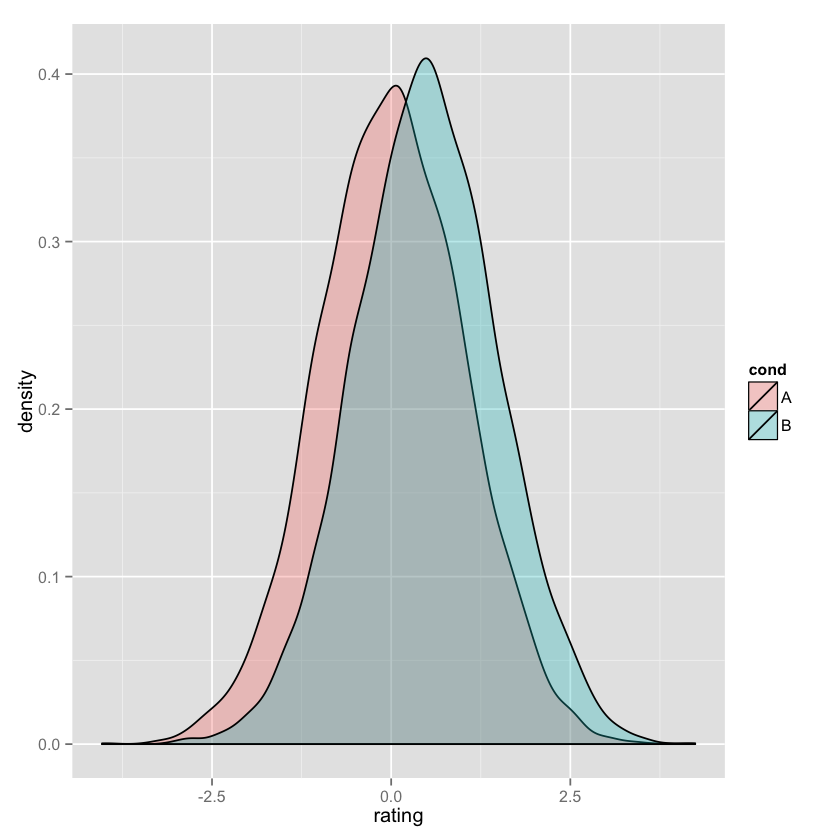

In [66]:
p = ggplot(data, aes(x=rating, fill=cond)) + geom_density(alpha=.3)
print(p)

Here we will set up the cohen's d function. It takes two inputs, the data for group1 and the data for group2. Cohen's d is a widely used standardized measure of effect size. It is calculated by taking the differences of two means and expressing that difference over a standardizer of some kind. Here we are using a pooled variance as our standardizer.


$$ d = (M_a - M_b) / s $$

The choice of standardizer will change depending on the question being asked. But, cohen's d is essentially a type of z score. 

In [67]:
cohens <- function(group1, group2){
  difference = mean(group1) - mean(group2)
  
  n1 = length(group1)
  n2 = length(group2)
  
  var1 = var(group1)
  var2 = var(group2)
  
  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = abs(difference / sqrt(pooled_var))  
}

Calculate and save the 'true' values of cohen's d and p values to compare with our simulated experiments later. The p value is very highly super mega siginificant because the 'sample sizes' are so big (exploiting this property of a p values leads to what is known as 'p value hacking'). As we will see later, cohen's d is less influenced by the size of the 'samples' it is being calculated for.

In [68]:
true_d = cohens(data$rating[data$cond == 'A'], data$rating[data$cond == 'B'])
print(true_d)

[1] 0.4888773


In [69]:
true_p = t.test(data$rating[data$cond == 'A'], data$rating[data$cond == 'B'])$p.value
print(true_p)

[1] 2.199331e-254


Here we will loop through 50 iterations of simulated experiments. In each experiment we will draw a random sample of 50 from the two populations that we set up earlier. We also set up two matricies to store the values that we get from each experiment. In each iteration we will calculate cohen's d and the p value of the two samples, we will then subtract the true values of cohen's d and p value from those of the experimental samples. After the 50 iterations we take the mean of those differences so that we can see on average how much the interpretation of each of those measurements could change in each experiment.

In [70]:
p_values = matrix(,nrow=iters)
cohens_d = matrix(,nrow=iters)

for (i in 1:iters) {
  sample_a = sample(data$rating[data$cond == 'A'], size = sample_size, replace=F)
  sample_b = sample(data$rating[data$cond == 'B'], size = sample_size, replace=F)

  d = cohens(sample_a, sample_b)
  cohens_d[i] = d - true_d
  
  p = t.test(sample_a, sample_b)$p.value
  p_values[i] = p - true_p
}

In [71]:
print('p values')
print(c(mean(p_values), sd(p_values)))
print('cohens d')
print(c(mean(cohens_d), sd(cohens_d)))

[1] "p values"
[1] 0.04919651 0.08025857
[1] "cohens d"
[1] 0.01633725 0.16349770


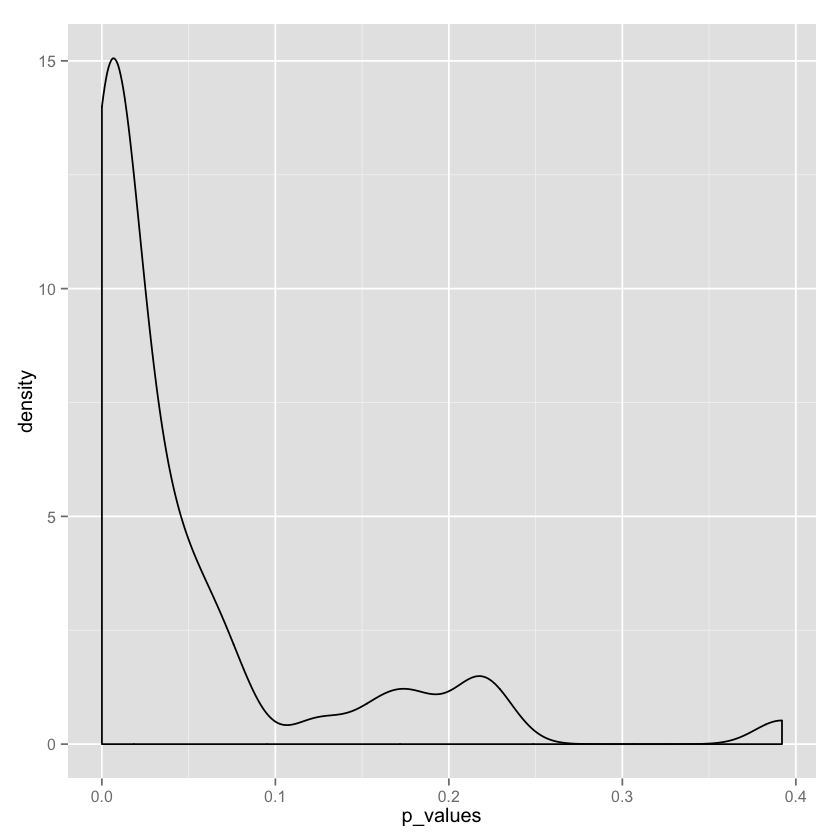

In [72]:
qplot(p_values, geom='density')

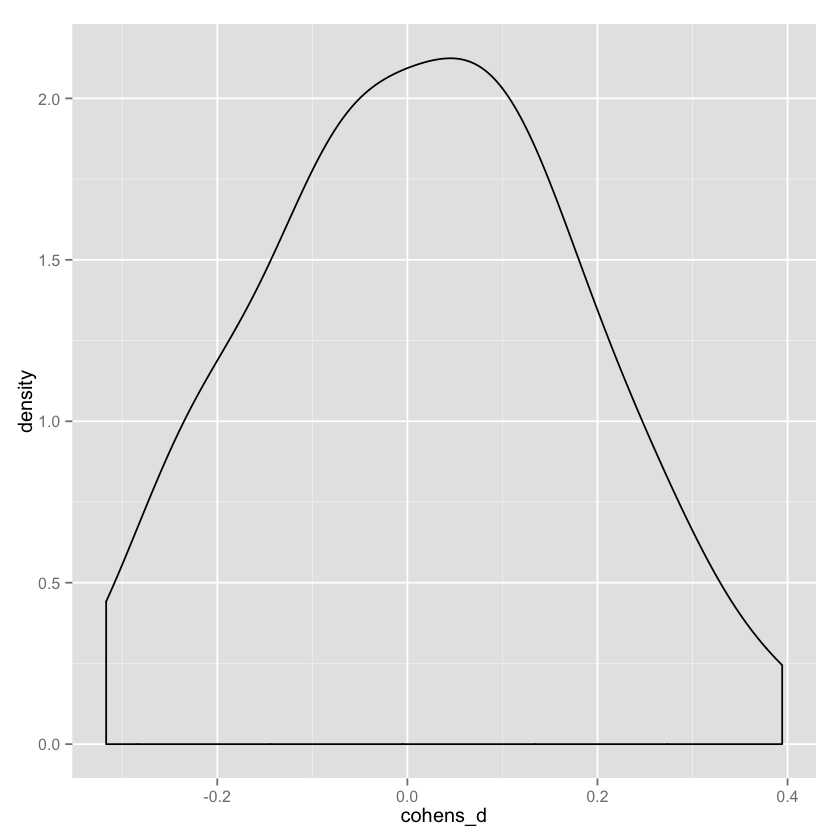

In [73]:
qplot(cohens_d, geom='density')

On average the experimental p values changed about 0.09. This is enough to change the interpretation of the experiment from 'Wow I found something really awesome!' to 'Dang, I really wasted my time with this experiment!'. On the other hand, cohen's d varied on average about -0.03. The interpretation there would shift between the two samples having overlaps between 80% and 82%, and there is a 64% or 63% chance that a person picked at random from group1 will have a higher score than a person picked at random from group2. The interpretation of the effect size given cohen's d of 0.5 or 0.48 would still be about a medium effect. 

As we can see from this crude simulation, cohen's d seems to be a much more stable way of gaining insight into populations from experiments done on samples of those populations. In other words, if there is a real difference in two populations the p value could still either be significant or not in an experiment. But, cohen's d is more likely to give you a more accurate picture.